## Изучение данных из файла

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st

### Таблица users

Прочтем и выведем на экран первые 5 строк таблицы

In [2]:
data_users = pd.read_csv('/datasets/users.csv')
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Выведем общую информацию о таблице

In [3]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод**: пропуски присутсвуют в столбце churn_date

### Таблица calls

Прочтем и выведем на экран первые 5 строк таблицы

In [4]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Выведем общую информацию о таблице

In [5]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Вывод**: пропуски отсутствуют

### Таблица messages

Прочтем и выведем на экран первые 5 строк таблицы

In [6]:
data_messages = pd.read_csv('/datasets/messages.csv')
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Выведем общую информацию о таблице

In [7]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Вывод**: пропуски отсутствуют

### Таблица internet

Прочтем и выведем на экран первые 5 строк таблицы

In [8]:
data_internet = pd.read_csv('/datasets/internet.csv')
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Выведем общую информацию о таблице

In [9]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Вывод**: пропуски отсутствуют

### Таблица tariffs

Прочтем и выведем на экран информацию о тарифах

In [10]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Предобработка данных

Что касается пропусков, то они присутствуют только в таблице **users** в столбце **churn_date**. Как упоминалось ранее, значения столбца - дата прекращения пользования тарифом и если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Поэтому пункт по заполнению пропущенных значений заканчивается на этом:)

Что касается дубликатов, то проверим каждую таблицу на их наличие

In [11]:
data_users.duplicated().sum()

0

In [12]:
data_calls.duplicated().sum()

0

In [13]:
data_messages.duplicated().sum()

0

In [14]:
data_internet.duplicated().sum()

0

In [15]:
data_tariffs.duplicated().sum()

0

Дубликаты отсутствуют, поэтому нам остается один пункт по предобработке данных - приведение к нужному типу

### Таблица users

Посмотрим, какие типы данных соответствуют каждому столбцу

In [16]:
data_users.dtypes

user_id        int64
age            int64
churn_date    object
city          object
first_name    object
last_name     object
reg_date      object
tariff        object
dtype: object

#### Столбец churn_date

Значения столбца - дата прекращения пользования тарифом. Поэтому тип столбца должен быть datetime.
Посмотрим, в каком формате должна быть записана дата в этом столбце.

In [17]:
data_users[data_users['churn_date'].isna() == False]['churn_date'].head()

19    2018-10-05
20    2018-12-18
34    2018-11-21
50    2018-10-03
51    2018-10-14
Name: churn_date, dtype: object

Приведем тип столбца к datetime в необходимом формате

In [18]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

#### Столбец reg_date

Значения столбца - дата подключения тарифа. Следовательно, тип должен соответствовать datetime. Посмотрим, в каком формате должна отображаться дата.

In [19]:
data_users['reg_date'].head()

0    2018-05-25
1    2018-11-01
2    2018-06-17
3    2018-08-17
4    2018-05-14
Name: reg_date, dtype: object

Приведем тип столбца к datetime в необходимом формате

In [20]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

### Таблица calls

Посмотрим, какие типы данных соответствуют каждому столбцу

In [21]:
data_calls.dtypes

id            object
call_date     object
duration     float64
user_id        int64
dtype: object

#### Столбец call_date

Значения столбца - дата звонка. Следовательно, тип должен соответствовать datetime. Посмотрим, в каком формате должна отображаться дата.

In [22]:
data_calls['call_date'].head()

0    2018-07-25
1    2018-08-17
2    2018-06-11
3    2018-09-21
4    2018-12-15
Name: call_date, dtype: object

Приведем тип столбца к datetime в необходимом формате

In [23]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

#### Столбец duration

Как было сказано ранее в примечании, «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт

Поэтому округлим значения в столбце в большую сторону до минуты

In [24]:
data_calls['duration'] = data_calls['duration'].apply(np.ceil)

### Таблица messages

Посмотрим, какие типы данных соответствуют каждому столбцу

In [25]:
data_messages.dtypes

id              object
message_date    object
user_id          int64
dtype: object

#### Столбец message_date

Значения столбца - дата сообщения.Следовательно, тип должен соответствовать datetime. Посмотрим, в каком формате должна отображаться дата.

In [26]:
data_messages['message_date'].head()

0    2018-06-27
1    2018-10-08
2    2018-08-04
3    2018-06-16
4    2018-12-05
Name: message_date, dtype: object

Приведем тип столбца к datetime в необходимом формате

In [27]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

### Таблица internet

In [28]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


В данной таблице откуда-то взялся непонятный столбец (которого даже не было в описании), который просто дублирует индексы. Удалим его.

In [29]:
del data_internet['Unnamed: 0']

Посмотрим, какие типы данных соответствуют каждому столбцу

In [30]:
data_internet.dtypes

id               object
mb_used         float64
session_date     object
user_id           int64
dtype: object

#### Столбец session_date

Значения столбца - дата интернет-сессии.Следовательно, тип должен соответствовать datetime. Посмотрим, в каком формате должна отображаться дата.

In [31]:
data_internet['session_date'].head()

0    2018-11-25
1    2018-09-07
2    2018-06-25
3    2018-08-22
4    2018-09-24
Name: session_date, dtype: object

Приведем тип столбца к datetime в необходимом формате

In [32]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

## Обнаруженные ошибки в данных

В датасетах по звонкам и израсходованным интернет-трафикам присутствуют нулевые значения:
- Звонки

Нулевые значения - это не ошибка. Нулями обозначены пропущенные звонки, поэтому обрабатывать их каким-либо образом не следует
- Интернет-трафик

Нулевые значения - это сессии, когда подлючение к интернету было включено, но в дальнейшем не было произведено ни одной операции  (например, случаи, когда появляется и сразу пропадает связь). Эти строки необходимо исключить из датафрейма.

In [33]:
data_internet['mb_used'] = data_internet['mb_used'].replace(0, np.NaN)
data_internet = data_internet.dropna()

## Расчет требуемых показателей

### Количество сделанных звонков и израсходованных минут разговора по месяцам

Добавим столбец, отображающий месяц каждого звонка

In [34]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month

Посчитаем количество звонков для каждого пользователя помесячно 

In [35]:
calls_per_month = data_calls.pivot_table(index='user_id', values='id',
                                         columns='month', aggfunc='count')

Посчитаем количество израсходованных минут для каждого пользователя помесячно

In [36]:
minutes_per_month = data_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

### Количество отправленных сообщений по месяцам

Добавим столбец, отображающий месяц каждой отправленной смс

In [37]:
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month

Посчитаем количество отправленных сообщений для каждого пользователя помесячно

In [38]:
messages_per_month = data_messages.groupby(['user_id', 'month'])['id'].count().reset_index()

Переименуем столбец 'id' в 'messages'

In [39]:
messages_per_month.rename(columns={'id':'messages'}, inplace=True)

### Объем израсходованного интернет-трафика по месяцам

Добавим столбец, отображающий месяц каждой интернет-сессии

In [40]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

Посчитаем количество израсходованного интернет-трафика для каждого пользователя помесячно

In [41]:
mb_per_month = data_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

### Помесячная выручка с каждого пользователя 

Создадим таблицу, в которой будут показаны помесячные расходы трафика для каждого пользователя, а также используемый тариф

In [42]:
used_traffic = minutes_per_month.merge(messages_per_month, on=['user_id', 'month'],
                        how='outer').merge(mb_per_month, on=['user_id', 'month'],
                                           how='outer').merge(data_users[['user_id', 'tariff']],
                                                              on='user_id', how='outer')

Переведем мегабайты в гигабайты

In [43]:
used_traffic['mb_used'] = used_traffic['mb_used'] / 1024
used_traffic.rename(columns={'mb_used':'gb_used', 'duration': 'minutes'}, inplace=True)

"Мегалайн" округляет значения помесячного интернет-трафика до гигабайта. Учтем этот факт.

In [44]:
used_traffic['gb_used'] = used_traffic['gb_used'].apply(np.ceil)

В таблице присутствуют пустые значения (NaN). В остальных ячейках присутствуют конкретные значения. Следовательно, можно сделать вывод, что если значения нет, значит конкретный пользователь в конкретный месяц не расходовал соответствующий трафик. Поэтому заполним эти NaN нулями

In [45]:
used_traffic = used_traffic = used_traffic.fillna(0)

Напишем функцию, определяющую помесячный доход от каждого пользователя

In [46]:
def income(used_traffic):
    if used_traffic['tariff'] == 'smart':            ### SMART
        if (used_traffic['minutes'] <= 500 and      ### укладываемся в тарифный план
            used_traffic['messages'] <= 50 and
            used_traffic['gb_used'] <= 15):
            return 550
        if (used_traffic['minutes'] > 500 and       ### превышаем лимит только по звонкам
            used_traffic['messages'] <= 50 and
            used_traffic['gb_used'] <= 15):
            return 550 + (used_traffic['minutes'] - 500)*3
        if (used_traffic['minutes'] <= 500 and      ### превышаем лимит только по смс
            used_traffic['messages'] > 50 and
            used_traffic['gb_used'] <= 15):
            return 550 + (used_traffic['messages'] - 50)*3
        if (used_traffic['minutes'] <= 500 and       ### превышаем лимит только по интернету
            used_traffic['messages'] <= 50 and
            used_traffic['gb_used'] > 15):
            return 550 + 200*math.ceil(used_traffic['gb_used'] - 15)
        if (used_traffic['minutes'] > 500 and      ### превышаем лимит по звонкам и смс
            used_traffic['messages'] > 50 and
            used_traffic['gb_used'] <= 15):
            return 550 + (used_traffic['minutes'] - 500)*3 + (used_traffic['messages'] - 50)*3
        if (used_traffic['minutes'] > 500 and      ### превышаем лимит по звонкам и интернету
            used_traffic['messages'] <= 50 and
            used_traffic['gb_used'] > 15):
            return 550 + (used_traffic['minutes'] - 500)*3 + 200*math.ceil(used_traffic['gb_used'] - 15)   
        if (used_traffic['minutes'] <= 500 and      ### превышаем лимит по смс и интернету
            used_traffic['messages'] > 50 and
            used_traffic['gb_used'] > 15):
            return 550 + (used_traffic['messages'] - 500)*3 + 200*math.ceil(used_traffic['gb_used'] - 15)    
        if (used_traffic['minutes'] > 500 and      ### превышаем лимит по всему
            used_traffic['messages'] > 50 and
            used_traffic['gb_used'] > 15):
            return 550 + (used_traffic['minutes'] - 500)*3 + (used_traffic['messages'] - 50)*3 + 200*math.ceil(used_traffic['gb_used'] - 15)  
    if used_traffic['tariff'] == 'ultra':            ### ULTRA
        if (used_traffic['minutes'] <= 3000 and      ### укладываемся в тарифный план
            used_traffic['messages'] <= 1000 and
            used_traffic['gb_used'] <= 30):
            return 1950
        if (used_traffic['minutes'] > 3000 and       ### превышаем лимит только по звонкам
            used_traffic['messages'] <= 1000 and
            used_traffic['gb_used'] <= 30):
            return 1950 + (used_traffic['minutes'] - 3000)
        if (used_traffic['minutes'] <= 3000 and      ### превышаем лимит только по смс
            used_traffic['messages'] > 1000 and
            used_traffic['gb_used'] <= 30):
            return 1950 + (used_traffic['messages'] - 1000)
        if (used_traffic['minutes'] <= 3000 and       ### превышаем лимит только по интернету
            used_traffic['messages'] <= 1000 and
            used_traffic['gb_used'] > 30):
            return 1950 + 150*math.ceil(used_traffic['gb_used'] - 30)
        if (used_traffic['minutes'] > 3000 and      ### превышаем лимит по звонкам и смс
            used_traffic['messages'] > 1000 and
            used_traffic['gb_used'] <= 30):
            return 1950 + (used_traffic['minutes'] - 3000) + (used_traffic['messages'] - 1000)
        if (used_traffic['minutes'] > 3000 and      ### превышаем лимит по звонкам и интернету
            used_traffic['messages'] <= 1000 and
            used_traffic['gb_used'] > 30):
            return 1950 + (used_traffic['minutes'] - 3000) + 150*math.ceil(used_traffic['gb_used'] - 30)    
        if (used_traffic['minutes'] <= 3000 and      ### превышаем лимит по смс и интернету
            used_traffic['messages'] > 1000 and
            used_traffic['gb_used'] > 30):
            return 1950 + (used_traffic['messages'] - 1000) + 150*math.ceil(used_traffic['gb_used'] - 30)
        if (used_traffic['minutes'] > 3000 and      ### превышаем лимит по всему
            used_traffic['messages'] > 1000 and
            used_traffic['gb_used'] > 30):
            return 1950 + (used_traffic['minutes'] - 3000) + (used_traffic['messages'] - 1000) + 150*math.ceil(used_traffic['gb_used'] - 30)   
       
            

Создадим столбец, отображающий помесячный доход от каждого пользователя

In [47]:
used_traffic['income'] = used_traffic.apply(income, axis=1)

In [48]:
used_traffic

,user_id,month,minutes,messages,gb_used,tariff,income
0,1000,5.0,159.0,22.0,3.0,ultra,1950.0
1,1000,6.0,172.0,60.0,23.0,ultra,1950.0
2,1000,7.0,340.0,75.0,14.0,ultra,1950.0
3,1000,8.0,408.0,81.0,14.0,ultra,1950.0
4,1000,9.0,466.0,57.0,15.0,ultra,1950.0
...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,21.0,20.0,smart,1550.0
3212,1489,11.0,0.0,20.0,18.0,smart,1150.0
3213,1489,12.0,0.0,35.0,17.0,smart,950.0
3214,1128,0.0,0.0,0.0,0.0,ultra,1950.0


## Анализ данных

In [49]:
used_traffic.head()

,user_id,month,minutes,messages,gb_used,tariff,income
0,1000,5.0,159.0,22.0,3.0,ultra,1950.0
1,1000,6.0,172.0,60.0,23.0,ultra,1950.0
2,1000,7.0,340.0,75.0,14.0,ultra,1950.0
3,1000,8.0,408.0,81.0,14.0,ultra,1950.0
4,1000,9.0,466.0,57.0,15.0,ultra,1950.0


### "smart" - клиенты

Выделем сегмент клиентов, использующих тариф "smart"

In [50]:
smart_clients = used_traffic.query('tariff=="smart"')

Посчитаем среднее количество, дисперсию и стандартное отклонение для минут разговоров, количества сообщений и израсходованного интернет-трафика по месяцам. Также, построим гистограммы. 

--------------------------------Минуты разговора--------------------------------
Среднее: 417.747533632287
Дисперсия: 36265.12415310985
Стандартное отклонение: 190.4340414765959


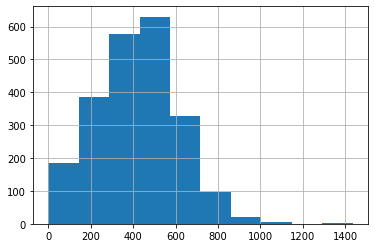




--------------------------------Количество сообщений--------------------------------
Среднее: 33.36905829596412
Дисперсия: 796.5978766916688
Стандартное отклонение: 28.224065559229217


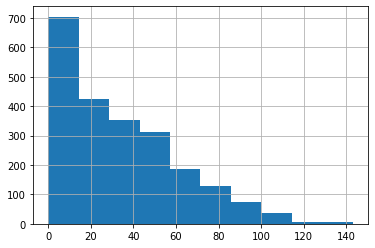




--------------------------------Объем интернет-трафика--------------------------------
Среднее: 16.32152466367713
Дисперсия: 33.11859498481772
Стандартное отклонение: 5.754875757548352


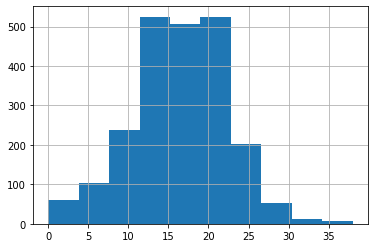

In [51]:
columns = ['minutes', 'messages', 'gb_used']
for col in columns:
    if col == 'minutes':
        print('--------------------------------Минуты разговора--------------------------------')
    elif col == 'messages':
        print('--------------------------------Количество сообщений--------------------------------')
    elif col == 'gb_used':
        print('--------------------------------Объем интернет-трафика--------------------------------')
    print(f'Среднее: {smart_clients[col].mean()}')
    print(f'Дисперсия: {np.var(smart_clients[col])}')
    print(f'Стандартное отклонение: {np.std(smart_clients[col])}')
    smart_clients[col].hist()
    plt.show()
    print(2*'\n')
        

**Выводы:**
- **Минуты разговора**: в среднем клиенты расходуют около 418 минут из 500 доступных. Гистограмма имеет вид нормального распределения с отрицательной скошенностью, что может говорить о том, что в большинству клиентов, использующих тариф smart все же хватает всключенных в тариф 500 минут.


- **Количество сообщений:** в среднем клиенты отправляют около 33 смс из 50 доступных. Гистограмма имеет вид показательноко распределения: клиенты, которым хватает 50 смс, включенных в тариф - подавляющее большинство.


- **Объем интернет-трафика:** в среднем клиенты расходуют около 16 Гб. Гистограма имеет вид нормального распределения. Выходит, что среднестатистическому клиенту, использующего тариф smart, недостаточно 15 Гб, включенных в тариф. 

### "ultra" - клиенты

Выделем сегмент клиентов, использующих тариф "ultra"

In [52]:
ultra_clients = used_traffic.query('tariff=="ultra"')

Посчитаем среднее количество, дисперсию и стандартное отклонение для минут разговоров, количества сообщений и израсходованного интернет-трафика по месяцам. Также, построим гистограммы. 

--------------------------------Минуты разговора--------------------------------
Среднее: 526.0892494929006
Дисперсия: 100950.00623331097
Стандартное отклонение: 317.72630711559117


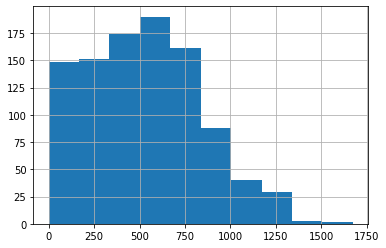




--------------------------------Количество сообщений--------------------------------
Среднее: 49.31338742393509
Дисперсия: 2283.0995570851965
Стандартное отклонение: 47.781791061922284


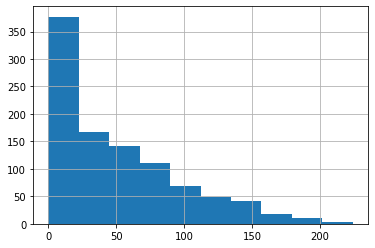




--------------------------------Объем интернет-трафика--------------------------------
Среднее: 19.474645030425965
Дисперсия: 97.27978308900676
Стандартное отклонение: 9.863051408616238


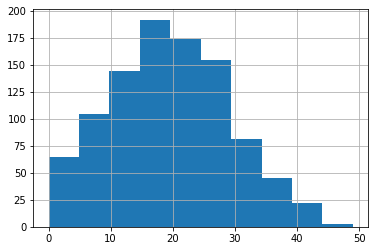

In [53]:
for col in columns:
    if col == 'minutes':
        print('--------------------------------Минуты разговора--------------------------------')
    elif col == 'messages':
        print('--------------------------------Количество сообщений--------------------------------')
    elif col == 'gb_used':
        print('--------------------------------Объем интернет-трафика--------------------------------')
    print(f'Среднее: {ultra_clients[col].mean()}')
    print(f'Дисперсия: {np.var(ultra_clients[col])}')
    print(f'Стандартное отклонение: {np.std(ultra_clients[col])}')
    ultra_clients[col].hist()
    plt.show()
    print(2*'\n')
        

**Выводы:**
- **Минуты разговора**: в среднем клиенты расходуют около 526 минут из 3000 доступных. Гистограмма имеет вид нормального распределения с явной отрицательной скошенностью. Так же видно, что подавляющее большинство клиентов данного тарифа не разговаривают более 1000 минут в месяц и нет ни одного клиента, который бы использовал сверхпакет по звонкам.


- **Количество сообщений:** в среднем клиенты отправляют около 49 смс из 1000 доступных. Гистограмма имеет вид показательноко распределения. Так же, как и со звонками, нет ни одного клиента, использующего сверхпакет.


- **Объем интернет-трафика:** в среднем клиенты расходуют около 19 Гб. Гистограма имеет вид нормального распределения с положительной скошенностью. Тем не менее, клиентов, которым не хватает 30 включенных в тариф Гб, не так и много.

--------------------------------Минуты разговора--------------------------------
smart:									ultra:
Среднее - 417.747533632287					Среднее - 526.0892494929006
Дисперсия - 36265.12415310985					Дисперсия - 100950.00623331097
Стандартное отклонение - 190.4340414765959				Стандартное отклонение - 317.72630711559117


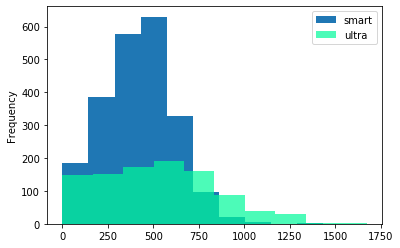




--------------------------------Количество сообщений--------------------------------
smart:									ultra:
Среднее - 33.36905829596412					Среднее - 49.31338742393509
Дисперсия - 796.5978766916688					Дисперсия - 2283.0995570851965
Стандартное отклонение - 28.224065559229217				Стандартное отклонение - 47.781791061922284


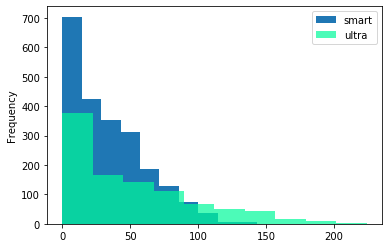




--------------------------------Объем интернет-трафика--------------------------------
smart:									ultra:
Среднее - 16.32152466367713					Среднее - 19.474645030425965
Дисперсия - 33.11859498481772					Дисперсия - 97.27978308900676
Стандартное отклонение - 5.754875757548352				Стандартное отклонение - 9.863051408616238


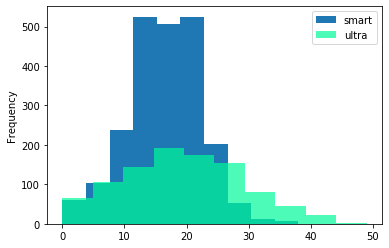

In [54]:
for col in columns:
    if col == 'minutes':
        print('--------------------------------Минуты разговора--------------------------------')
    elif col == 'messages':
        print('--------------------------------Количество сообщений--------------------------------')
    elif col == 'gb_used':
        print('--------------------------------Объем интернет-трафика--------------------------------')
    print('smart:', end=9*'\t')
    print('ultra:')
    print(f'Среднее - {smart_clients[col].mean()}', end=5*'\t')
    print(f'Среднее - {ultra_clients[col].mean()}')
    print(f'Дисперсия - {np.var(smart_clients[col])}', end=5*'\t')
    print(f'Дисперсия - {np.var(ultra_clients[col])}')
    print(f'Стандартное отклонение - {np.std(smart_clients[col])}', end=4*'\t')
    print(f'Стандартное отклонение - {np.std(ultra_clients[col])}')
    smart_clients[col].plot(y=col, kind='hist', alpha=1)
    ultra_clients[col].plot(y=col, kind='hist', color='mediumspringgreen', alpha=0.7)
    #plt.ylabel('')
    plt.legend(['smart', 'ultra'])
    plt.show()
    print(2*'\n')

## Проверка гипотез

### Первая гипотеза 

# "Средняя выручка пользователей тарифов ultra и smart различаются"

Чтобы это проверить, необходимо сформулировать нулевую (H0) и альтернативную гипотезу (H1):
- Нулевая гипотеза (H0) - cредние выручки пользователей тарифов ultra и smart **равны**
- Альтернативная гипотеза (H1) - средняя выручка пользователей тарифов ultra и smart **различаются**

Так как нам важен только факт различия средней выручки пользователей разных тарифов, то для проверки гипотез будем использовать двусторонний t-тест для двух генеральных совокупностей. Зададим пороговое значение aplha = 0.05

In [55]:
alpha = 0.05
results_1 = st.ttest_ind(used_traffic[used_traffic['tariff']=='smart']['income'],
                         used_traffic[used_traffic['tariff']=='ultra']['income'])
results_1.pvalue

1.590528892747372e-191

Полученное p-value оказалось меньше заданного, следовательно, отвергаем нулевую гипотезу о равенстве средних выручек пользователей разных тарифов. А значит, средняя выручка пользователей тарифов ultra и smart **различаются**

### Вторая гипотеза 

# "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

Для начала добавим в таблицу о помесячной выручке с каждого клиента информацию о городе клиента

In [56]:
used_traffic = used_traffic.merge(data_users[['user_id', 'city']], on='user_id', how='outer')

Теперь сформулируем нулевую (H0) и альтернативную (H1) гипотезы:
- Нулевая гипотеза (H0) - средняя выручка пользователей из Москвы **равна** средней выручке пользователей из других регионов 
- Альтернативная гипотеза (H1) - cредняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов

Так как нам важен только факт различия средней выручки московских пользователей и пользователей других регионов, то для проверки гипотез будем использовать двусторонний t-тест для двух генеральных совокупностей. Зададим пороговое значение aplha = 0.05

In [57]:
result_2 = st.ttest_ind(used_traffic[used_traffic['city']=='Москва']['income'],
                        used_traffic[used_traffic['city']!='Москва']['income'])
result_2.pvalue

0.06064803548259309

Полученное p-value оказалось больше заданного, следовательно, мы не можем отвергнуть нулевую гипотезу. А значит, средняя выручка московских пользователей **НЕ отличается** от среднеей выручки пользователей из други регионов

## Определение перспективного тарифа для телеком-компании

Посчитаем общую выручку по тарифам

Выручка пользователей тарифа smart -  2611301.0
Выручка пользователей тарифа ultra -  2041050.0


Text(0, 0.5, '')

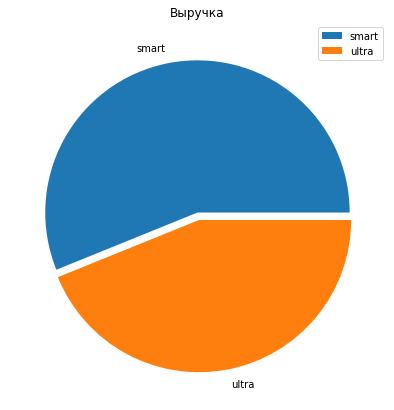

In [58]:
print(f'Выручка пользователей тарифа smart - ', used_traffic[used_traffic['tariff']=='smart']['income'].sum())
print(f'Выручка пользователей тарифа ultra - ', used_traffic[used_traffic['tariff']=='ultra']['income'].sum())
used_traffic.groupby('tariff')['income'].sum().plot(y='income',
                                                    kind='pie', explode=(0, 0.05),
                                                    title='Выручка', figsize=(7,7), legend='True')
plt.ylabel('')

Посчитаем количество пользователей каждого тарифа

Выручка пользователей тарифа smart -  2230
Выручка пользователей тарифа ultra -  986


Text(0, 0.5, '')

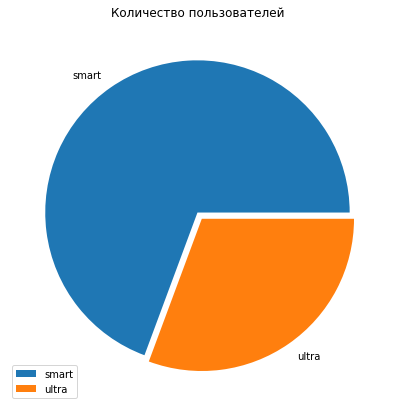

In [59]:
print(f'Выручка пользователей тарифа smart - ', used_traffic[used_traffic['tariff']=='smart']['income'].count())
print(f'Выручка пользователей тарифа ultra - ', used_traffic[used_traffic['tariff']=='ultra']['income'].count())
used_traffic.groupby('tariff')['income'].count().plot(y='income',
                                                    kind='pie', explode=(0, 0.05),
                                                    title='Количество пользователей', figsize=(7,7), legend='True')
plt.ylabel('')

**Выводы:** 

Тариф smart приносит около 60% всей выручки, при этом количество пользователей тарифа smart - 2230. Остальные 40% выручки приносит тариф ultra, но эту выручку приносят 986 пользователей. Ранее мы выяснили, что пользователям тарифа smart (стоимость 550 рублей в месяц) не хватает бесплатного лимита и в итоге они доплачивают за дополнительные 1-2 Гб, то есть 200-400 рублей. В итоге получается, среднестатистический пользователь тарифа smart готов платить около 900 рублей в месяц. 

Что касается пользователей тарифа ultra(стоимость 1950 рублей в месяц), то им практически всегда хватает бесплатного лимита, за исключением небольшого количества пользователей, которые доплачивают за 5 Гб(стоимость 1 Гб - 150 рублей).

В итоге "Мегалайну" необходимо предложить клиентам промежуточный вариант между smart и ultra, который позволил бы клиенту более комфортно, без дополнительных затрат, пользоваться услугами связи (особенно мобильным интернетом). В среднем клиенты тарифа smart отдают около 1000 рублей в месяц, что свидетельствует о том, что большинство клиентов данного тарифа готовы отдавать такую сумму. Нарпимер, можно предложить тариф, который будет стоить 950 рублей и включать в себя 20 Гб. Но при этом бесплатные лимиты по звонкам и смс были бы похожи по значениям на smart. Скажем, некий smart plus.

## Общий вывод

При анализе средней помесячной выручки различных пользователей удалось выяснить, что:
- пользователям тарифа smart не хватает бесплатного лимита и по звонкам, и по смс, и по интернету
- пользователям тарифа ultra с головой хватает бесплатного лимита, за исключением небольшого количества пользователей относительно интернета
- средняя выручка пользователей тарифов ultra и smart различаются
- средняя выручка московских пользователей не отличается от среднеей выручки пользователей из други регионов
- Тариф smart приносит около 60% всей выручки, но при этом данным тарифом пользуются в два раза больше клиентов, чем ultra. Плюс ко всему очень много пользователей тарифа smart переплачивают за дополнительный пакет. Поэтому "Мегалайну" необходимо выработать промежуточное решение между smart и ultra